<a href="https://colab.research.google.com/github/Sedowlas/EDA/blob/main/Credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Предобработка

In [ ]:
import pandas as pd 
import numpy as np

Загружаю базы данных

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

Подключаю датасет

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Смотрю колонки

In [ ]:
df.columns = df.columns.str.replace(' ','_').str.lower()

Изменяю размер и пробелы в колонках

In [ ]:
df.drop('rownumber',axis=1,inplace=True)

In [ ]:
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##Анализ

In [ ]:
df.isna().mean()

customerid         0.0
surname            0.0
creditscore        0.0
geography          0.0
gender             0.0
age                0.0
tenure             0.0
balance            0.0
numofproducts      0.0
hascrcard          0.0
isactivemember     0.0
estimatedsalary    0.0
exited             0.0
dtype: float64

Смотрю пропуски

In [ ]:
len(df)

10000

Смотрю общее количество строк

In [ ]:
df.groupby('exited').agg('count')

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
exited,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


Узнали что общее количество клиентов которые хотят покунуть банк составляет 2037 человек

In [ ]:
(df.groupby('geography')
['exited']
.agg(['count','mean','median']))

,count,mean,median
geography,,,
France,5014,0.161548,0.0
Germany,2509,0.324432,0.0
Spain,2477,0.166734,0.0


Мы видим что в Германии процент человек которые хотят покунуть банк больше чем в Испании и Франции

In [ ]:
(df.groupby('age')
['exited']
.agg(['count','mean','median']))

,count,mean,median
age,,,
18,22,0.090909,0.0
19,27,0.037037,0.0
20,40,0.050000,0.0
21,53,0.056604,0.0
22,84,0.142857,0.0
...,...,...,...
83,1,0.000000,0.0
84,2,0.500000,0.5
85,1,0.000000,0.0


In [ ]:
df['age_group'] = pd.cut(df['age'],5)

In [ ]:
(df.groupby('age_group')
['exited']
.agg(['count','mean','median']))

,count,mean,median
age_group,,,
"(17.926, 32.8]",2790,0.076344,0.0
"(32.8, 47.6]",5500,0.188182,0.0
"(47.6, 62.4]",1351,0.529978,1.0
"(62.4, 77.2]",335,0.214925,0.0
"(77.2, 92.0]",24,0.041667,0.0


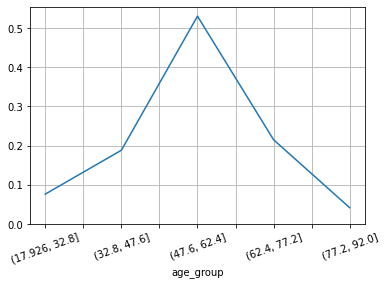

In [ ]:
df.groupby('age_group')['exited'].mean().plot(rot=20,ylim=0,grid=True)

Возраст клиентов которые хотят покинуть банк (47-60) 950 человек

In [ ]:
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,age_group
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(32.8, 47.6]"
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(32.8, 47.6]"
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(32.8, 47.6]"
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(32.8, 47.6]"
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(32.8, 47.6]"


In [ ]:
(df.groupby('gender')
['exited']
.agg(['count','mean','median']))

,count,mean,median
gender,,,
Female,4543,0.250715,0.0
Male,5457,0.164559,0.0


Узнали что в основном хотят покинуть банк женщины !

In [ ]:
(df.groupby('creditscore')
['exited']
.agg(['count','mean','median']))

,count,mean,median
creditscore,,,
350,5,1.000000,1.0
351,1,1.000000,1.0
358,1,1.000000,1.0
359,1,1.000000,1.0
363,1,1.000000,1.0
...,...,...,...
846,5,0.400000,0.0
847,6,0.333333,0.0
848,5,0.000000,0.0


In [ ]:
df['creditscore_group'] = pd.cut(df['creditscore'],40)

In [ ]:
(df.groupby('creditscore_group')
['exited']
.agg(['count','mean','median']))

,count,mean,median
creditscore_group,,,
"(349.5, 362.5]",8,1.000000,1.0
"(362.5, 375.0]",4,1.000000,1.0
"(375.0, 387.5]",5,1.000000,1.0
"(387.5, 400.0]",2,1.000000,1.0
"(400.0, 412.5]",15,0.400000,0.0
"(412.5, 425.0]",36,0.222222,0.0
"(425.0, 437.5]",56,0.250000,0.0
"(437.5, 450.0]",63,0.222222,0.0
"(450.0, 462.5]",69,0.173913,0.0


Видим что люди у которых маленький кредитный рейтинг хотят покинуть банк

In [ ]:
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,age_group,creditscore_group
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(32.8, 47.6]","(612.5, 625.0]"
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(32.8, 47.6]","(600.0, 612.5]"
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(32.8, 47.6]","(500.0, 512.5]"
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(32.8, 47.6]","(687.5, 700.0]"
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(32.8, 47.6]","(837.5, 850.0]"


In [ ]:
(df.groupby('tenure')
['exited']
.agg(['count','mean','median']))

,count,mean,median
tenure,,,
0,413,0.230024,0.0
1,1035,0.224155,0.0
2,1048,0.191794,0.0
3,1009,0.211100,0.0
4,989,0.205258,0.0
5,1012,0.206522,0.0
6,967,0.202689,0.0
7,1028,0.172179,0.0
8,1025,0.192195,0.0


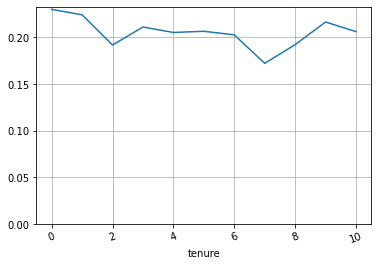

In [ ]:
df.groupby('tenure')['exited'].mean().plot(rot=20,ylim=0,grid=True)

Процент людей у которых нет каких-либо владений(земля, собственность) прекращают сотрудничество с банком !

In [ ]:
(df.groupby('balance')
['exited']
.agg(['count','mean','median']))

,count,mean,median
balance,,,
0.00,3617,0.138236,0.0
3768.69,1,1.000000,1.0
12459.19,1,1.000000,1.0
14262.80,1,0.000000,0.0
16893.59,1,0.000000,0.0
...,...,...,...
216109.88,1,1.000000,1.0
221532.80,1,0.000000,0.0
222267.63,1,1.000000,1.0


In [ ]:
df['balance_group'] = pd.cut(df['balance'],5)

In [ ]:
(df.groupby('balance_group')
['exited']
.agg(['count','mean','median']))

,count,mean,median
balance_group,,,
"(-250.898, 50179.618]",3692,0.142470,0.0
"(50179.618, 100359.236]",1533,0.199609,0.0
"(100359.236, 150538.854]",3828,0.257837,0.0
"(150538.854, 200718.472]",915,0.217486,0.0
"(200718.472, 250898.09]",32,0.593750,1.0


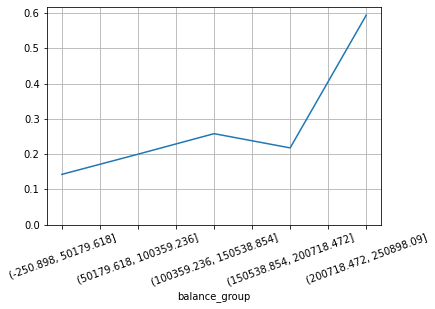

In [ ]:
df.groupby('balance_group')['exited'].mean().plot(rot=20,ylim=0,grid=True)

Отчетливо видим что люди у которых баланс на счету от 200718-250898 хотят покинуть банк!

In [ ]:
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,age_group,creditscore_group,balance_group
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(32.8, 47.6]","(612.5, 625.0]","(-250.898, 50179.618]"
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(32.8, 47.6]","(600.0, 612.5]","(50179.618, 100359.236]"
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(32.8, 47.6]","(500.0, 512.5]","(150538.854, 200718.472]"
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(32.8, 47.6]","(687.5, 700.0]","(-250.898, 50179.618]"
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(32.8, 47.6]","(837.5, 850.0]","(100359.236, 150538.854]"


In [ ]:
(df.groupby('numofproducts')
['exited']
.agg(['count','mean','median']))

,count,mean,median
numofproducts,,,
1,5084,0.277144,0.0
2,4590,0.075817,0.0
3,266,0.827068,1.0
4,60,1.000000,1.0


Клиенты у которых 3-4 продукта хотят покинуть банк!

In [ ]:
(df.groupby('hascrcard')
['exited']
.agg(['count','mean','median']))

,count,mean,median
hascrcard,,,
0,2945,0.208149,0.0
1,7055,0.201843,0.0


У 7055 клиентов есть кредитная карта банка, уйдет 20%, примерно 1411 человек покинут банк у которых есть кредитная карта. И 589 человек у которых нет кредитной карты банка !

In [ ]:
(df.groupby('isactivemember')
['exited']
.agg(['count','mean','median']))

,count,mean,median
isactivemember,,,
0,4849,0.268509,0.0
1,5151,0.142691,0.0


Процент людей которые не являются участниками банка, хотят прекратить сотрудничество, нежели тех кто является участником!

In [ ]:
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,age_group,creditscore_group,balance_group
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(32.8, 47.6]","(612.5, 625.0]","(-250.898, 50179.618]"
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(32.8, 47.6]","(600.0, 612.5]","(50179.618, 100359.236]"
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(32.8, 47.6]","(500.0, 512.5]","(150538.854, 200718.472]"
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(32.8, 47.6]","(687.5, 700.0]","(-250.898, 50179.618]"
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(32.8, 47.6]","(837.5, 850.0]","(100359.236, 150538.854]"


In [ ]:
(df.groupby('estimatedsalary')
['exited']
.agg(['count','mean','median']))

,count,mean,median
estimatedsalary,,,
11.58,1,1.0,1.0
90.07,1,0.0,0.0
91.75,1,1.0,1.0
96.27,1,0.0,0.0
106.67,1,0.0,0.0
...,...,...,...
199909.32,1,0.0,0.0
199929.17,1,0.0,0.0
199953.33,1,0.0,0.0


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df['estimatedsalary_group'] = pd.cut(df['estimatedsalary'],10)

In [ ]:
(df.groupby('estimatedsalary_group')
['exited']
.agg(['count','mean','median']))

,count,mean,median
estimatedsalary_group,,,
"(-188.401, 20009.67]",987,0.200608,0.0
"(20009.67, 40007.76]",968,0.202479,0.0
"(40007.76, 60005.85]",1006,0.189861,0.0
"(60005.85, 80003.94]",1027,0.206426,0.0
"(80003.94, 100002.03]",1002,0.195609,0.0
"(100002.03, 120000.12]",1027,0.205453,0.0
"(120000.12, 139998.21]",1007,0.194638,0.0
"(139998.21, 159996.3]",982,0.209776,0.0
"(159996.3, 179994.39]",1009,0.222993,0.0


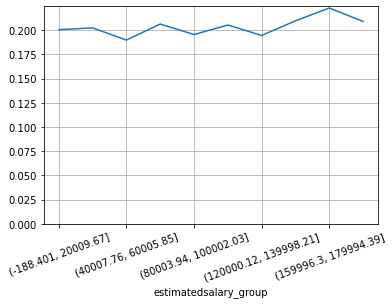

In [ ]:
df.groupby('estimatedsalary_group')['exited'].mean().plot(rot=20,ylim=0,grid=True)

На графике мы видим что процент людей которые хотят покинуть банк в группах(50000-75000, 105000-115000, 130000-200000)